In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import regex as re
import matplotlib.animation as animation

In [3]:
filepath = '../test/V1/Output.log'

In [4]:
# stores tuple of process at each time step
process = [];
nIter = 0;

In [5]:
f = open (filepath, "r")
nextIsSpecies = False
SpeciesDict = {}
nSpecies = 0

# Looking for the number of iterations
for l in f:
    line = l.split()
    if (line[0] == "Reading" and line[1] == "Species"):
        nextIsSpecies = True
    elif (nextIsSpecies):
        if (line[0] == "Reading"):
            SpeciesDict[line[1]] = nSpecies
            nSpecies = nSpecies + 1
        else:
            nextIsSpecies = False
    elif (line[0] == "Running" and line[2] == "iterations"):
        nIter = int(line[1])
        f.close()
        break

In [6]:
# Dimensions of the lattice
(x, y) = (4, 4)
started = False
ts = 0
nextIsProcessName = False
nextLatticeHeight = False
#Initialize layer
layer = []

#Initialize results
results = []

f = open(filepath, "r")

# Iterate through each time step
for l in f:
    line = l.split()
    if ((not started) and line[0] == "Time"):
        started = True
    if (line[0] == "Time" and line[1] == "step:"):
        ts = int(line[2])
        nextIsProcessName = True;
        continue
    elif (nextIsProcessName):
        process.append((ts, line[0]))
        nextIsProcessName = False
    elif (not nextLatticeHeight and line[0] == "---------------------------------------"):
        nextLatticeHeight = True
    elif (nextLatticeHeight and line[0] == "---------------------------------------"):
        results.append(layer)
        layer = []
        nextLatticeHeight = False
    elif(nextLatticeHeight):
        line = ' '.join(line)
        # Split into substrings
        parsed = re.findall(r'\(.*?\)', line) 
        heights = [x.split()[1] for x in parsed]
        species_codes = [x[x.find("[") + 1:x.find("]")] for x in parsed]

        for i in range(len(species_codes)):
            if species_codes[i].strip():
                species_codes[i] = species_codes[i].split()
                species_codes[i] = [SpeciesDict[x] for x in species_codes[i]]
        res2 = [(heights[i], species_codes[i]) for i in range(len(heights))]
        layer.append(res2)


<IPython.core.display.Javascript object>


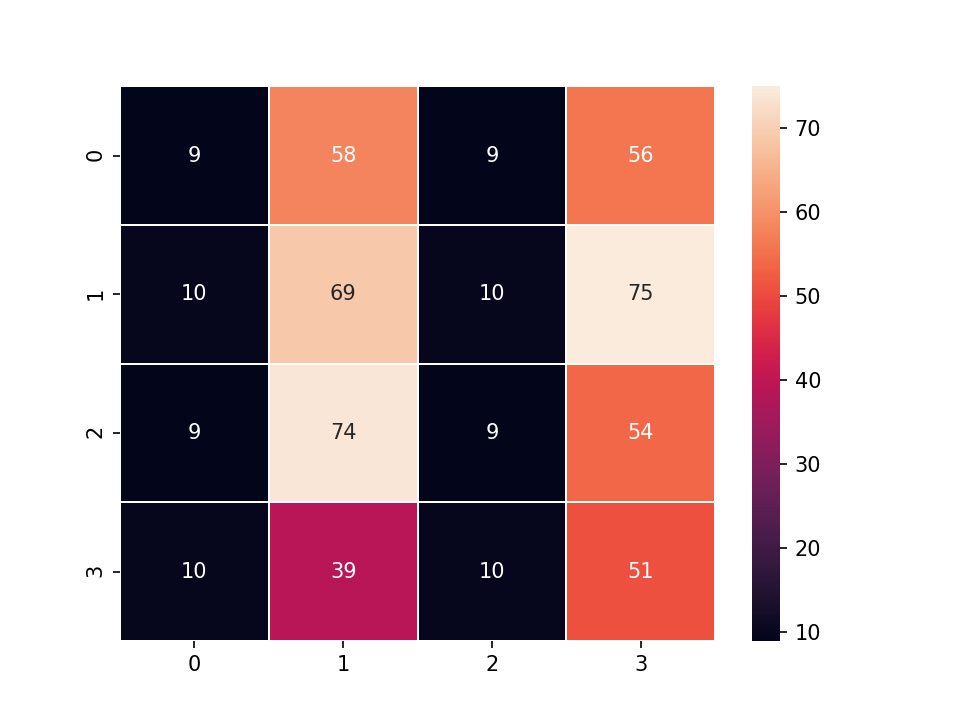

In [7]:
#https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1
#https://stackoverflow.com/questions/33742845/how-to-animate-a-seaborns-heatmap-or-correlation-matrix
%matplotlib notebook

def init():
    sns.heatmap(np.zeros((4, 4)), square=True, cbar=False)
def animate(i):
    plt.clf()
    layer = results[i]
    textList = []
    temp = []
    result = np.zeros((x, y))
    for j in range(x):
        for k in range(y):
            result[j, k] = int(layer[j][k][0].replace(',', ''))
            textList.append(layer[j][k][1])    
        temp = []
    text = np.array(textList, dtype=object)
    labels = (np.asarray(["{0}".format(t) for t in text])).reshape(x,y)
    ax = sns.heatmap(result, linewidth=0.5, annot=True)
fig = plt.figure()
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(results), repeat=True)
